In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import ugradio 
plt.rcParams['mathtext.fontset'],plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 22})

# Load in Initial On/Off Data

In [2]:
data_on = np.load('Data/Raspberry_Pi/on_line_raw.npy')
data_off = np.load('Data/Raspberry_Pi/off_line_raw.npy')

## Calculate the Average Power

In [6]:
freqs = np.fft.fftshift(np.fft.fftfreq(2048,1/2.2e6)) /1e6 #we sampled with resolution of 2048 samples at 2.2 MHz

def calc_ave_power(data):
    """
    A function to calculate the average power of sampled data
    """
    fft = np.fft.fft(data)
    power = np.abs(fft)**2
    avg = np.mean(power,axis=0)
    
    return avg
    

In [ ]:
avg_on = calc_ave_power(data_on)
avg_off = calc_ave_power(data_off)

## Plot Data

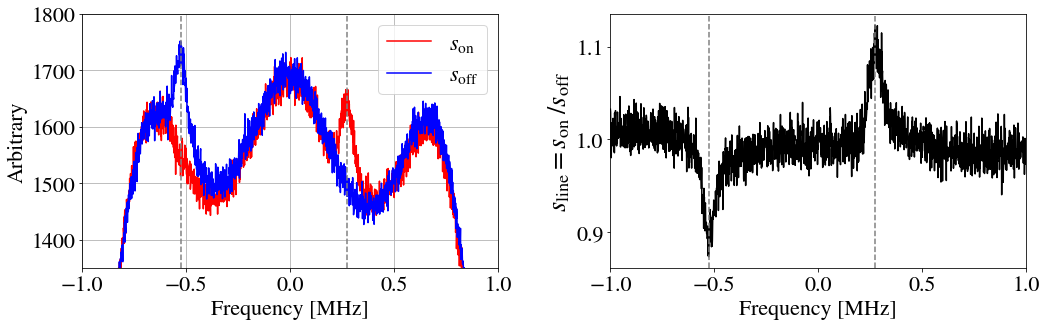

In [52]:
f, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(freqs,np.fft.fftshift(avg_on), color="red", label="$s_{\mathrm{on}}$")
axes[0].plot(freqs,np.fft.fftshift(avg_off), color="blue", label="$s_{\mathrm{off}}$")
axes[0].axvline(0.275,0,2500, linestyle="--", color="gray")
axes[0].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[0].set_ylim(1350, 1800)
axes[0].set_xlim(-1,1)
axes[0].set_xlabel("Frequency [MHz]")
axes[0].set_ylabel("Arbitrary")
axes[0].grid()
axes[0].legend()


axes[1].plot(freqs, np.fft.fftshift(avg_on/avg_off), color="black")
axes[1].set_xlim(-1,1)
axes[1].axvline(0.275,0,2500, linestyle="--", color="gray")
axes[1].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[1].set_xlabel("Frequency [MHz]")
axes[1].set_ylabel("$s_{\mathrm{line}} = s_{\mathrm{on}} \; / s_{\mathrm{off}}$", fontsize=26)
f.tight_layout()
plt.show()

s_line = avg_on/avg_off

# Blackbody Callibration

In [39]:
sky_raw = np.load('Data/Raspberry_Pi/cold_raw_zenith.npy').reshape(-1,2048) #our data had 2048 samples
blackbody_raw = np.load('Data/Raspberry_Pi/cal_raw_zenith.npy')

In [40]:
avg_sky = calc_ave_power(sky_raw)
avg_blackbody = calc_ave_power(blackbody_raw)

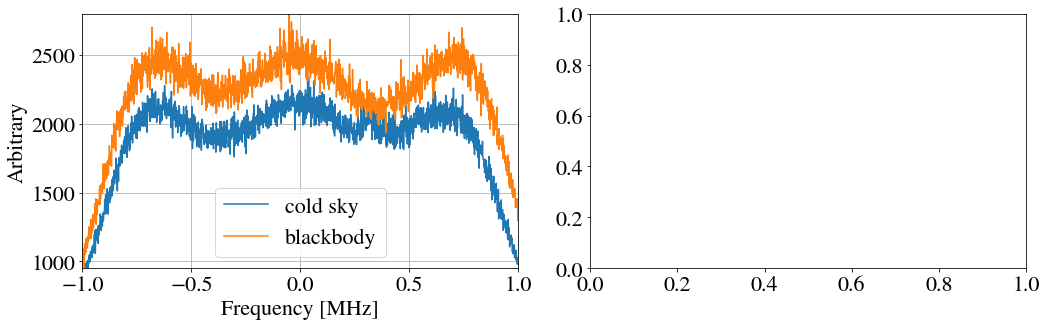

In [109]:

f, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(freqs,np.fft.fftshift(avg_sky)*G,label='cold sky')
axes[0].plot(freqs,np.fft.fftshift(avg_blackbody)*G ,label='blackbody')
# axes[0].axvline(0.275,0,2500, linestyle="--", color="gray")
# axes[0].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[0].set_ylim(950, 2800)
axes[0].set_xlim(-1,1)
axes[0].set_xlabel("Frequency [MHz]")
axes[0].set_ylabel("Arbitrary")
axes[0].grid()
axes[0].legend()


# axes[1].plot(freqs, np.fft.fftshift(avg_on/avg_off), color="black")
# axes[1].set_xlim(-1,1)
# axes[1].axvline(0.275,0,2500, linestyle="--", color="gray")
# axes[1].axvline(-0.525,0,2500, linestyle="--", color="gray")
# axes[1].set_xlabel("Frequency [MHz]")
# axes[1].set_ylabel("$s_{\mathrm{on}} \; / s_{\mathrm{off}}$", fontsize=26)
f.tight_layout()
plt.show()

In [108]:
ΔT = (np.mean(np.fft.fftshift(avg_blackbody - avg_sky)[:1024]) )

G = 300 / ΔT #300 Kelvin for human blackbody
print("Gain: {0:0.4f}".format(G)) 

Gain: 1.2661


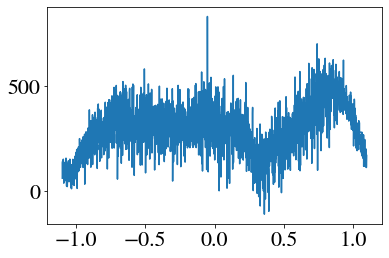

In [106]:
plt.plot(freqs, np.fft.fftshift(avg_blackbody - avg_sky)*G)

# Plot $s_{\mathrm{line}}$ with Units

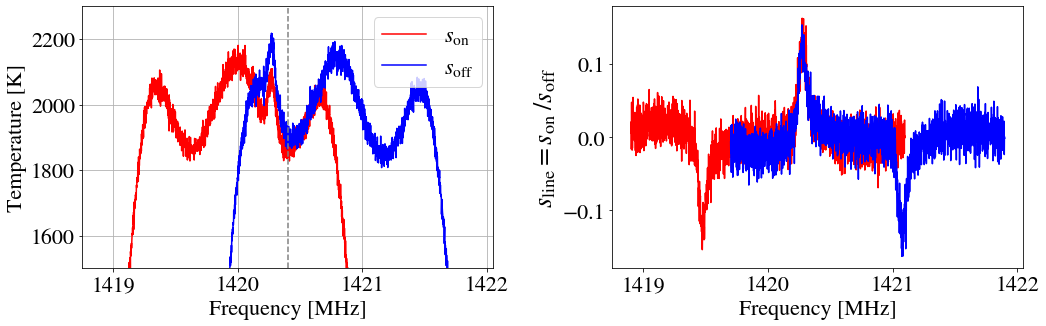

In [120]:
f, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(freqs + 1420, np.fft.fftshift(avg_on) * G, color="red", label="$s_{\mathrm{on}}$")
axes[0].plot(freqs + 1420.8, np.fft.fftshift(avg_off) * G, color="blue", label="$s_{\mathrm{off}}$")
axes[0].axvline(1420.4,0,2500, linestyle="--", color="gray")
# axes[0].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[0].set_ylim(1500, 2300)
# axes[0].set_xlim(-1,1)
axes[0].set_xlabel("Frequency [MHz]")
axes[0].set_ylabel("Temperature [K]")
axes[0].grid()
axes[0].legend()


axes[1].plot(freqs + 1420, np.fft.fftshift(s_line - np.median(s_line)) * G, color="red")
axes[1].plot(freqs + 1420.8, np.fft.fftshift(-(s_line- np.median(s_line))) * G, color="blue")
# axes[1].set_xlim(-1,1)
# axes[1].axvline(0.275,0,2500, linestyle="--", color="gray")
# axes[1].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[1].set_xlabel("Frequency [MHz]")
axes[1].set_ylabel("$s_{\mathrm{line}} = s_{\mathrm{on}} \; / s_{\mathrm{off}}$", fontsize=26)
f.tight_layout()
plt.show()

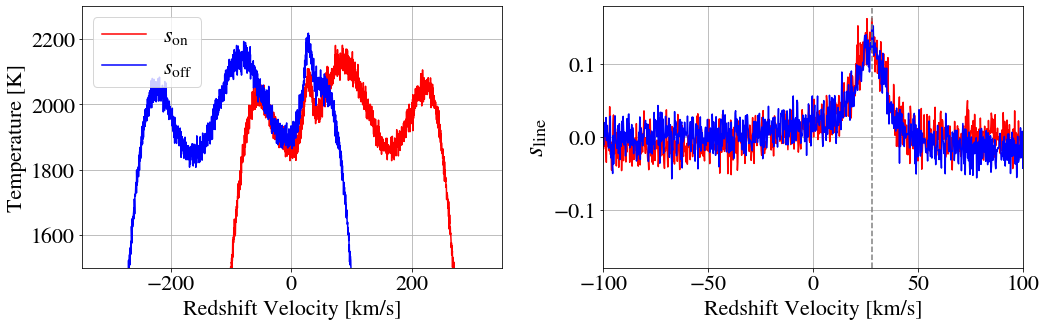

In [151]:
velocity_on = -3e5 * ((freqs + 1420) - 1420.4058)/1420.4058
velocity_off = -3e5 * ((freqs + 1420.8) - 1420.4058)/1420.4058

f, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(velocity_on, np.fft.fftshift(avg_on) * G, color="red", label="$s_{\mathrm{on}}$")
axes[0].plot(velocity_off, np.fft.fftshift(avg_off) * G, color="blue", label="$s_{\mathrm{off}}$")
# axes[0].axvline(1420.4,0,2500, linestyle="--", color="gray")
# axes[0].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[0].set_ylim(1500, 2300)
# axes[0].set_xlim(-1,1)
axes[0].set_xlabel("Redshift Velocity [km/s]")
axes[0].set_ylabel("Temperature [K]")
axes[0].grid()
axes[0].legend()

axes[1].plot(velocity_on, np.fft.fftshift(s_line - np.median(s_line)) * G, color="red")
axes[1].plot(velocity_off, np.fft.fftshift(-(s_line- np.median(s_line))) * G, color="blue")
axes[1].set_xlim(-100,100)
axes[1].axvline(velocity_on[np.argmax(np.fft.fftshift(s_line - np.median(s_line)) * G)],0,2500, linestyle="--", color="gray")
# axes[1].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[1].set_xlabel("Redshift Velocity [km/s]")
axes[1].set_ylabel("$s_{\mathrm{line}}$", fontsize=26)
axes[1].grid()
f.tight_layout()
plt.show()

In [150]:
v_21cm = velocity_on[np.argmax(np.fft.fftshift(s_line))]
print("We find that the 21 cm line is moving away from us at {0:0.3f} km/s".format(v_21cm))

We find that the 21 cm line is moving away from us at 27.853 km/s


In [158]:
correction = ugradio.doppler.get_projected_velocity(13.04, 37.873199, 2459627.65).value / 1000
print("We have a velocity correction of {0:0.3f} km/s".format(correction))

We have a velocity correction of -23.083 km/s


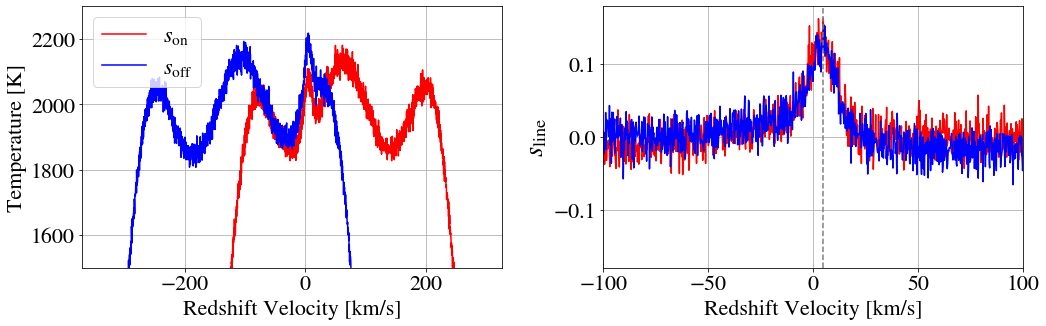

In [160]:
velocity_on = -3e5 * ((freqs + 1420) - 1420.4058)/1420.4058
velocity_off = -3e5 * ((freqs + 1420.8) - 1420.4058)/1420.4058

f, axes = plt.subplots(1,2, figsize=(15,5))

axes[0].plot(velocity_on + correction, np.fft.fftshift(avg_on) * G, color="red", label="$s_{\mathrm{on}}$")
axes[0].plot(velocity_off + correction, np.fft.fftshift(avg_off) * G, color="blue", label="$s_{\mathrm{off}}$")
# axes[0].axvline(1420.4,0,2500, linestyle="--", color="gray")
# axes[0].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[0].set_ylim(1500, 2300)
# axes[0].set_xlim(-1,1)
axes[0].set_xlabel("Redshift Velocity [km/s]")
axes[0].set_ylabel("Temperature [K]")
axes[0].grid()
axes[0].legend()

axes[1].plot(velocity_on + correction, np.fft.fftshift(s_line - np.median(s_line)) * G, color="red")
axes[1].plot(velocity_off + correction, np.fft.fftshift(-(s_line- np.median(s_line))) * G, color="blue")
axes[1].set_xlim(-100,100)
axes[1].axvline(velocity_on[np.argmax(np.fft.fftshift(s_line - np.median(s_line)) * G)] + correction,0,2500, linestyle="--", color="gray")
# axes[1].axvline(-0.525,0,2500, linestyle="--", color="gray")
axes[1].set_xlabel("Redshift Velocity [km/s]")
axes[1].set_ylabel("$s_{\mathrm{line}}$", fontsize=26)
axes[1].grid()
f.tight_layout()
plt.show()

In [161]:
v_21cm = velocity_on[np.argmax(np.fft.fftshift(s_line))] + correction
print("We find that the 21 cm line is actually moving away from us at {0:0.3f} km/s".format(v_21cm))

We find that the 21 cm line is actually moving away from us at 4.770 km/s
